In [ ]:
# Question 1: What is the most common name in the social network and how many people share it?

In [2]:
#Importing the users table to answer the first question

import pandas as pd

user = pd.read_csv('user_table.csv')

display (user.head(5))

,Surname,Name,Age,Subscription Date
0,Smith,Sarah,30,1588157373
1,Picard,Francine,32,1588161732
2,Roth,Hans,40,1588157337
3,Pomme,Ali,28,1588165636
4,Di Lillo,Jordi,42,1588156042


In [3]:
#Creating a new column to show the fullnames (Name and surname)

user['Full name'] = user['Name'] + "  " + user['Surname']

user.head(5)


,Surname,Name,Age,Subscription Date,Full name
0,Smith,Sarah,30,1588157373,Sarah Smith
1,Picard,Francine,32,1588161732,Francine Picard
2,Roth,Hans,40,1588157337,Hans Roth
3,Pomme,Ali,28,1588165636,Ali Pomme
4,Di Lillo,Jordi,42,1588156042,Jordi Di Lillo


In [4]:
#Determining the common name and the people who share it

user['Full name'].value_counts(ascending = False).head(5)

Josie  Bond        11
Sarah  Bond        10
Thomas  Smith      10
Timothy  Picard    10
Thomas  Meier      10
Name: Full name, dtype: int64

In [6]:
n = 5
user['Full name'].value_counts()[:n].index.tolist()#data mining dummies respery py

['Josie  Bond',
 'Sarah  Bond',
 'Thomas  Smith',
 'Timothy  Picard',
 'Thomas  Meier']

# Josie Bond is the most common name with 11 people  sharing it

In [ ]:
# Question2: List the five people with the most posts and reactions combined

In [8]:
#Uploading the posts and reactions and user table

posts = pd.read_csv('posts_table.csv')

display (posts.head(5))

,User,Post Type,Post Date
0,1,Image,1588166977
1,1,Status_Change,1588167686
2,1,Text,1588168633
3,1,Image,1588163570
4,1,Image,1588168986


In [9]:
Reactions = pd.read_csv('reactions_table.csv')

display (Reactions.head(5))

,User,Reaction Type,Reaction Date
0,3741,Comment,1588168107
1,711,Emoticon,1588166846
2,701,Emoticon,1588163334
3,4750,Emoticon,1588168182
4,656,Comment,1588162272


In [72]:
#Reindexing the user column in the user table so as to make a common column to successfully combine user table with posts and reactions table

import pandas as pd
user = pd.read_csv('user_table.csv')
user.index.name = 'User'
user.index +=1
display (user.head(5))


,Surname,Name,Age,Subscription Date
User,,,,
1,Smith,Sarah,30,1588157373
2,Picard,Francine,32,1588161732
3,Roth,Hans,40,1588157337
4,Pomme,Ali,28,1588165636
5,Di Lillo,Jordi,42,1588156042


In [74]:
#creating a new data frame by merging the user table and post table with respect to the common user column

df1 = pd.merge(user, posts, on='User', how='outer')
df1


,User,Surname,Name,Age,Subscription Date,Post Type,Post Date
0,1,Smith,Sarah,30,1588157373,Image,1588166977
1,1,Smith,Sarah,30,1588157373,Status_Change,1588167686
2,1,Smith,Sarah,30,1588157373,Text,1588168633
3,1,Smith,Sarah,30,1588157373,Image,1588163570
4,1,Smith,Sarah,30,1588157373,Image,1588168986
...,...,...,...,...,...,...,...
13153,1000,Thronton,Franz,28,1588171183,Video,1588167641
13154,1000,Thronton,Franz,28,1588171183,Image,1588162930
13155,1000,Thronton,Franz,28,1588171183,Gif,1588164214
13156,1000,Thronton,Franz,28,1588171183,Video,1588163573


In [75]:
#combining the new data frame (df1) with reactions table and creating a new column for counting posts and reactions combined

df2 = df1.append(Reactions)
df2['Posts and Reactions'] = ''
df2 = df2.groupby(['User']).count()
df2

,Surname,Name,Age,Subscription Date,Post Type,Post Date,Reaction Type,Reaction Date,Posts and Reactions
User,,,,,,,,,
1,18,18,18,18,18,18,0,0,18
2,11,11,11,11,11,11,0,0,11
3,13,13,13,13,13,13,0,0,13
4,15,15,15,15,15,15,0,0,15
5,10,10,10,10,10,10,0,0,10
...,...,...,...,...,...,...,...,...,...
8727,0,0,0,0,0,0,121,121,121
8729,0,0,0,0,0,0,98,98,98
8948,0,0,0,0,0,0,135,135,135


In [76]:
#determining the five users with the most post and reactions combined.

Result = pd.merge(user,df2[['Posts and Reactions']], on='User', how='outer').sort_values('Posts and Reactions', ascending=False)
Result.head(5)

,Surname,Name,Age,Subscription Date,Posts and Reactions
User,,,,,
642,Mueller,Ali,5.0,1.588145e+09,241
664,Picard,Zoe,46.0,1.588161e+09,154
67,Gwahsi,Agaba,51.0,1.588156e+09,151
678,Kirk,Andreas,28.0,1.588156e+09,150
653,Kirk,Alok,18.0,1.588159e+09,148


# Users with the most posts and reactions combined are
# user 642 - 241 posts
# user  664 - 154 posts
# user  67 -  151 posts
# user  678 - 150 posts
# user  653 - 148 posts

In [ ]:
#Question 3: Create a plot of the friendship graph for all users named „Jean-Luc Picard“ (up to degree 2)

In [38]:
#To find the user ids of particular names using the users table: create a new data frame to display specific information

userid = user.drop(columns = ['Subscription Date', 'Age']).loc[(user['Name'] == "Timothy") & (user['Surname'] == "Smith")]
userid

,Surname,Name
User,,
612,Smith,Timothy
859,Smith,Timothy
905,Smith,Timothy
944,Smith,Timothy


In [78]:
#To select friends of a particular userid
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

friends = pd.read_csv('friends_table.csv')

#Creating the friends list up to first degree
frnd1 = friends[(friends['Friend 1'].eq(642))] 
frnd1

,Friend 1,Friend 2
5987,642,656
5988,642,531
5989,642,62
5990,642,27
5991,642,33


In [79]:
#Creating the friends list of up to second degree
frnd2 = friends[(friends['Friend 1'].eq(642)) | (friends['Friend 1'].eq(656)) | (friends['Friend 1'].eq(531)) | (friends['Friend 1'].eq(62)) | (friends['Friend 1'].eq(27)) | (friends['Friend 1'].eq(33))]
frnd2

,Friend 1,Friend 2
263,27,774
264,27,322
265,27,201
266,27,431
267,27,463
268,27,460
315,33,411
316,33,584
317,33,872
318,33,943


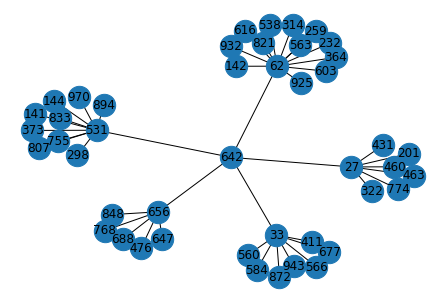

In [80]:
#creating the friendship graph of timothy's network
timothy=nx.from_pandas_edgelist(frnd2, 'Friend 1',  'Friend 2')
nx.draw(timothy, with_labels=True, node_size=500)
plt.show()

In [83]:
#To find the userids of Jean-Luc Picard using the users table: create a new data frame to display specific information

userid = user.drop(columns = ['Subscription Date', 'Age']).loc[(user['Name'] == "Jean-Luc") & (user['Surname'] == "Picard")]
userid

,Surname,Name
User,,


In [ ]:
#There are no such name as Jean-Luc Picard in the database